In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-number-plate-detection/Indian_Number_plates.json


In [2]:
import urllib
import matplotlib.pyplot as plt
import cv2
import glob
import os
import time
from PIL import Image

In [3]:
df = pd.read_json("/kaggle/input/vehicle-number-plate-detection/Indian_Number_plates.json", lines=True)
df.head()

,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN


In [4]:
df.shape

(237, 3)

In [5]:
new_csv=df.to_csv("indian_license_plates.csv", index=False)

In [6]:
new_df=pd.read_csv("/kaggle/working/indian_license_plates.csv")
new_df.head(10)

,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
5,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
6,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
7,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
8,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
9,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN


In [7]:
df['annotation'][0]

[{'label': ['number_plate'],
  'notes': '',
  'points': [{'x': 0.722084367245657, 'y': 0.5879828326180251},
   {'x': 0.8684863523573201, 'y': 0.688841201716738}],
  'imageWidth': 806,
  'imageHeight': 466}]

In [8]:
os.mkdir("Number Plates")

# Changing the dataset view..
# Decoding the Annotations Column:-->

# We have to separate the Image name, Image Width,Image Height,Top X Coordinate, Top Y Coordinate, Bottom x Coordinate, Bootom Y Coordinate..

In [9]:
data = dict()
data["img_name"] = list()
data["img_width"] = list()
data["img_height"] = list()
data["top-x"] = list()
data["top-y"] = list()
data["bottom-x"] = list()
data["bottom-y"] = list()

In [10]:
data

{'img_name': [],
 'img_width': [],
 'img_height': [],
 'top-x': [],
 'top-y': [],
 'bottom-x': [],
 'bottom-y': []}

In [11]:
df['annotation'][0]

[{'label': ['number_plate'],
  'notes': '',
  'points': [{'x': 0.722084367245657, 'y': 0.5879828326180251},
   {'x': 0.8684863523573201, 'y': 0.688841201716738}],
  'imageWidth': 806,
  'imageHeight': 466}]

In [12]:
df['annotation'][0][0]["points"]

[{'x': 0.722084367245657, 'y': 0.5879828326180251},
 {'x': 0.8684863523573201, 'y': 0.688841201716738}]

In [13]:
new_df.head(5)

,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN


In [14]:
# for index,row in new_df.iterrows():
#     print(row)

In [15]:
count = 0
for index, row in df.iterrows():
    img = urllib.request.urlopen(row["content"])
    img = Image.open(img)
    img = img.convert('RGB')
    img.save("Number Plates/car{}.jpeg".format(count), "JPEG")
    
    data["img_name"].append("car{}".format(count))
    
    d = row["annotation"]
    
    data["img_width"].append(d[0]["imageWidth"])
    data["img_height"].append(d[0]["imageHeight"])
    data["top-x"].append(d[0]["points"][0]["x"])
    data["top-y"].append(d[0]["points"][0]["y"])
    data["bottom-x"].append(d[0]["points"][1]["x"])
    data["bottom-y"].append(d[0]["points"][1]["y"])
    
    count += 1
    
print("Done Successfully")    

Done Successfully


In [16]:
# data

In [17]:
new_data=pd.DataFrame(data)
new_data.head()

,img_name,img_width,img_height,top-x,top-y,bottom-x,bottom-y
0,car0,806,466,0.722084,0.587983,0.868486,0.688841
1,car1,494,449,0.161943,0.850780,0.582996,1.000000
2,car2,500,314,0.082000,0.697452,0.230000,0.828025
3,car3,500,469,0.434000,0.667377,0.718000,0.765458
4,car4,1001,563,0.208791,0.390764,0.865135,0.984014


# So we have successsfully decoded the data to a dataset..

In [18]:
new_data.dtypes

img_name       object
img_width       int64
img_height      int64
top-x         float64
top-y         float64
bottom-x      float64
bottom-y      float64
dtype: object

In [19]:
new_data.describe()

,img_width,img_height,top-x,top-y,bottom-x,bottom-y
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,657.172996,460.755274,0.297356,0.460222,0.704473,0.694672
std,434.944220,297.809060,0.159295,0.169160,0.170625,0.136937
min,229.000000,139.000000,0.012000,0.004878,0.152905,0.107317
25%,470.000000,302.000000,0.198000,0.361582,0.607038,0.604167
50%,500.000000,379.000000,0.304808,0.475550,0.696822,0.699301
75%,660.000000,485.000000,0.368000,0.586134,0.828125,0.778846
max,3720.000000,2472.000000,0.797500,0.850780,1.000000,1.000000


In [20]:
new_data.shape

(237, 7)

In [21]:
new_data.dtypes

img_name       object
img_width       int64
img_height      int64
top-x         float64
top-y         float64
bottom-x      float64
bottom-y      float64
dtype: object

In [22]:
new_data['img_name']=new_data['img_name']+".jpeg"

In [23]:
new_data

,img_name,img_width,img_height,top-x,top-y,bottom-x,bottom-y
0,car0.jpeg,806,466,0.722084,0.587983,0.868486,0.688841
1,car1.jpeg,494,449,0.161943,0.850780,0.582996,1.000000
2,car2.jpeg,500,314,0.082000,0.697452,0.230000,0.828025
3,car3.jpeg,500,469,0.434000,0.667377,0.718000,0.765458
4,car4.jpeg,1001,563,0.208791,0.390764,0.865135,0.984014
...,...,...,...,...,...,...,...
232,car232.jpeg,500,366,0.344000,0.609290,0.706000,0.778689
233,car233.jpeg,500,333,0.368000,0.453453,0.616000,0.618619
234,car234.jpeg,500,332,0.334000,0.608434,0.628000,0.768072
235,car235.jpeg,586,331,0.295222,0.601208,0.441980,0.719033


In [24]:
width= 300
height= 300
channels= 3

# Seeing the pictures in 300*300 dimension:-->

In [25]:
def viewimage(t):
    
    image = cv2.imread("Number Plates/" + new_data["img_name"].iloc[t])
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dsize=(width,height))
    
    top_x=int(new_data['top-x'].iloc[t]* width)
    top_y=int(new_data['top-y'].iloc[t]*height)
    bot_x=int(new_data['bottom-x'].iloc[t]*height)
    bot_y=int(new_data['bottom-y'].iloc[t]*height)
    
    
    new_img=cv2.rectangle(image,(top_x,top_y),(bot_x,bot_y),(0, 0, 255), 1)
    
    plt.imshow(new_img)
    
    plt.show()

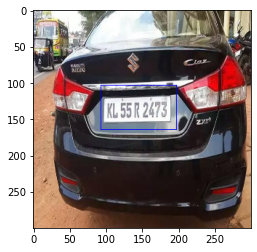

In [26]:
viewimage(10)

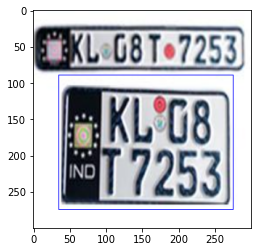

In [27]:
viewimage(100)

In [28]:
n = 10
drop_indices = np.random.choice(new_data.index, n, replace=False)
df_subset = new_data.drop(drop_indices)

In [29]:
df_subset

,img_name,img_width,img_height,top-x,top-y,bottom-x,bottom-y
0,car0.jpeg,806,466,0.722084,0.587983,0.868486,0.688841
1,car1.jpeg,494,449,0.161943,0.850780,0.582996,1.000000
2,car2.jpeg,500,314,0.082000,0.697452,0.230000,0.828025
3,car3.jpeg,500,469,0.434000,0.667377,0.718000,0.765458
4,car4.jpeg,1001,563,0.208791,0.390764,0.865135,0.984014
...,...,...,...,...,...,...,...
232,car232.jpeg,500,366,0.344000,0.609290,0.706000,0.778689
233,car233.jpeg,500,333,0.368000,0.453453,0.616000,0.618619
234,car234.jpeg,500,332,0.334000,0.608434,0.628000,0.768072
235,car235.jpeg,586,331,0.295222,0.601208,0.441980,0.719033


In [30]:
drop_indices

array([ 89, 136, 147,  67,  73, 200,  82,  12,  66,  59])

In [31]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

Using TensorFlow backend.


In [32]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

In [33]:
train_generator = datagen.flow_from_dataframe(
    df_subset,
    directory="Number Plates/",
    x_col="img_name",
    y_col=["top-x", "top-y", "bottom-x", "bottom-y"],
    target_size=(width,height),
    batch_size=32, 
    class_mode="raw",
    subset="training")

validation_generator = datagen.flow_from_dataframe(
    df_subset,
    directory="Number Plates/",
    x_col="img_name",
    y_col=["top-x", "top-y", "bottom-x", "bottom-y"],
    target_size=(width,height),
    batch_size=32, 
    class_mode="raw",
    subset="validation")

Found 205 validated image filenames.
Found 22 validated image filenames.


In [34]:
train_generator

In [35]:
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(width,height,channels)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 9, 9, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 260       
Total params: 20,035,908
Trainable params: 5,321,220
Non-trainable params: 14,714,688
__________________________________

In [37]:
STEP_SIZE_TRAIN = int(np.ceil(train_generator.n / train_generator.batch_size))
STEP_SIZE_VAL = int(np.ceil(validation_generator.n / validation_generator.batch_size))

print("Train step size:", STEP_SIZE_TRAIN)
print("Validation step size:", STEP_SIZE_VAL)

train_generator.reset()
validation_generator.reset()

Train step size: 7
Validation step size: 1


In [38]:
adam = Adam(lr=0.0005)
model.compile(optimizer=adam, loss="mse",metrics=['accuracy'])

In [43]:
history = model.fit_generator(train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VAL,
    epochs=20)

Epoch 1/20
7/7 [==============================] - 4s 584ms/step - loss: 0.0016 - accuracy: 0.9024 - val_loss: 0.0148 - val_accuracy: 0.8182
Epoch 2/20
7/7 [==============================] - 4s 565ms/step - loss: 0.0011 - accuracy: 0.9122 - val_loss: 0.0138 - val_accuracy: 0.8636
Epoch 3/20
7/7 [==============================] - 4s 567ms/step - loss: 6.8146e-04 - accuracy: 0.9317 - val_loss: 0.0132 - val_accuracy: 0.8182
Epoch 4/20
7/7 [==============================] - 4s 573ms/step - loss: 4.9181e-04 - accuracy: 0.9561 - val_loss: 0.0131 - val_accuracy: 0.7727
Epoch 5/20
7/7 [==============================] - 4s 529ms/step - loss: 3.6919e-04 - accuracy: 0.9707 - val_loss: 0.0135 - val_accuracy: 0.8636
Epoch 6/20
7/7 [==============================] - 4s 573ms/step - loss: 2.5053e-04 - accuracy: 0.9805 - val_loss: 0.0137 - val_accuracy: 0.8636
Epoch 7/20
7/7 [==============================] - 4s 535ms/step - loss: 2.2308e-04 - accuracy: 0.9805 - val_loss: 0.0137 - val_accuracy: 0.7727


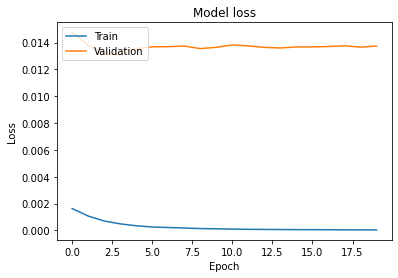

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [51]:
import pytesseract

TypeError: Cannot handle this data type

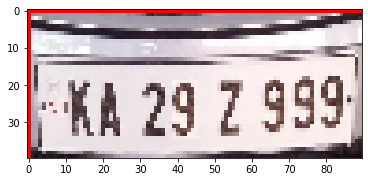

In [63]:
for idx, row in new_data.iloc[drop_indices].iterrows():    
    
    img = cv2.resize(cv2.imread("Number Plates/" + row['img_name']) / 255.0, dsize=(width,height))
    y_hat = model.predict(img.reshape(1, width,height, 3)).reshape(-1) * width
    
    xt, yt = y_hat[0], y_hat[1]
    xb, yb = y_hat[2], y_hat[3]
    
    img = cv2.cvtColor(img.astype(np.float32),cv2.COLOR_BGR2RGB)
    image = cv2.rectangle(img, (xt, yt), (xb, yb), (0,0,255), 1)
    
    clone = image.copy() 
    crop_img = clone[int(yt):int(yb),int(xt):int(xb)] 
    RGB = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB)
   
#     plt.imshow(crop_img)
    
    ## Detecting Car Number
    car_number = pytesseract.image_to_string(RGB, lang="eng")
    print(car_number)
    plt.show()

# We saw here that our moel is locating the board locations decently..